##### __Importing the data__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv("fraud_bank_transctions_dataset.csv")


##### DATA OVERVIEW 

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

checking for null values in the all columns

In [7]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [8]:
missing_values=df.isnull().sum()
missing_values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

##### Exploratory Data Analysis

PLotting correlation matrix to obeserve relation between the columns

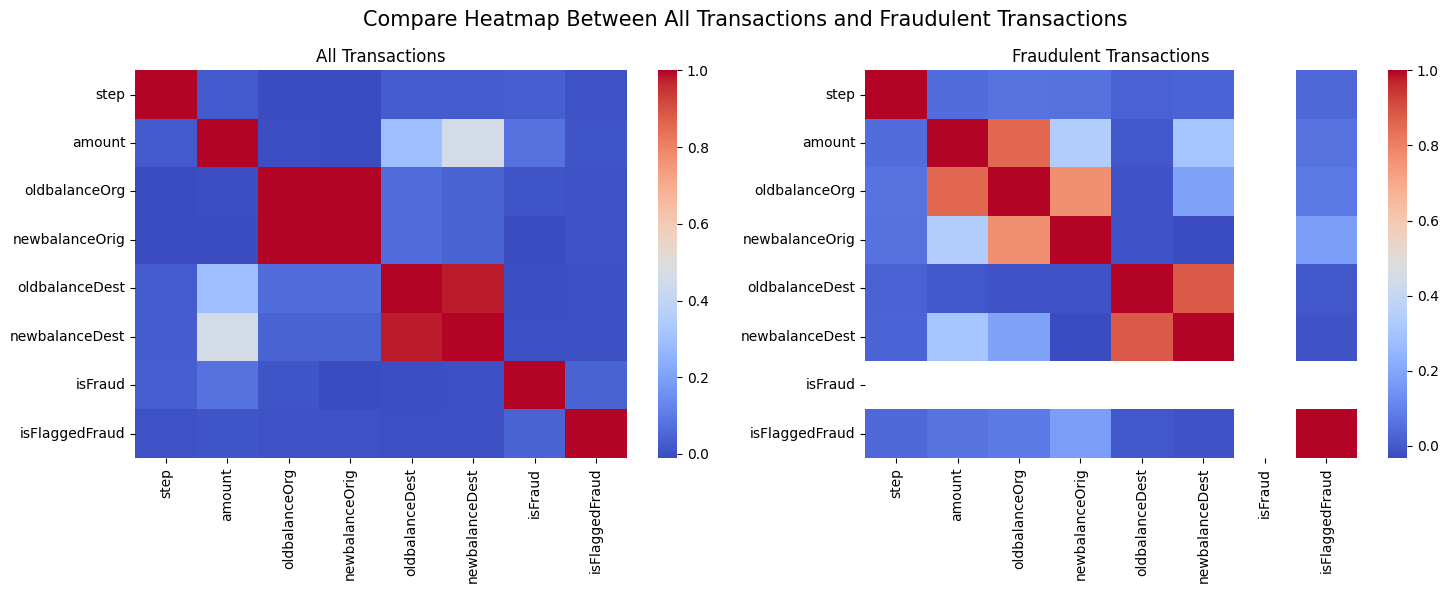

In [14]:
temp = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for 'df' dataframe
corr_df = temp.corr()

# Filter fraudulent transactions
fraudulent_transactions = temp[df['isFraud'] == 1]

# Compute the correlation matrix for 'fraudulent_transactions' dataframe
corr_fraudulent = fraudulent_transactions.corr()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for 'df' dataframe
sns.heatmap(corr_df, annot=False, fmt=".2f", cmap='coolwarm', ax=ax[0])
ax[0].set_title("All Transactions", fontsize=12)

# Heatmap for 'fraudulent_transactions' dataframe
sns.heatmap(corr_fraudulent, annot=False, fmt=".2f", cmap='coolwarm', ax=ax[1])
ax[1].set_title("Fraudulent Transactions", fontsize=12)

fig.suptitle('Compare Heatmap Between All Transactions and Fraudulent Transactions', fontsize=15)

plt.tight_layout()
plt.show()


total number of fraud transctions

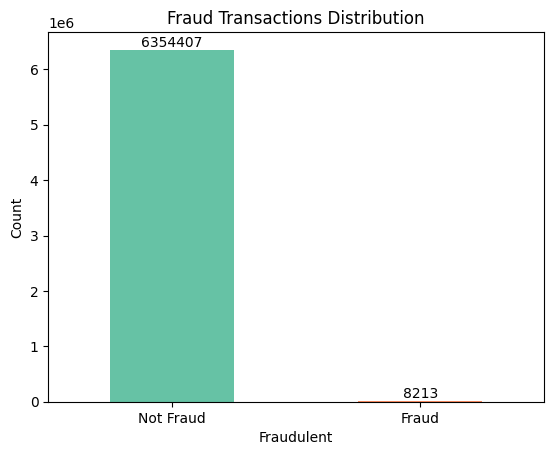

In [9]:
colors = sns.color_palette("Set2")
fraud_counts = df['isFraud'].value_counts()

# Create the bar plot
ax = fraud_counts.plot(kind='bar', color=colors)

# Add counts on top of the bars
for i, count in enumerate(fraud_counts):
    ax.text(i, count + 1000, str(count), ha='center', va='bottom')

# Labels and title
plt.xlabel("Fraudulent")
plt.ylabel("Count")
plt.title("Fraud Transactions Distribution")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation=0)

plt.show()

C:\Users\LOKESH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LOKESH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LOKESH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

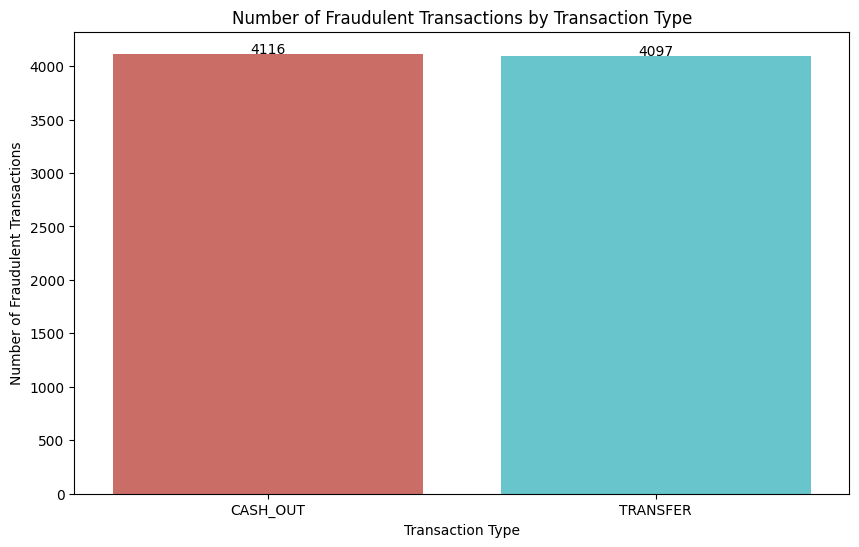

In [10]:
# Filter fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]

# Group by transaction type and count fraudulent transactions
fraudulent_transactions_by_type = fraudulent_transactions.groupby('type').size().reset_index(name='fraudulent_count')

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='fraudulent_count', data=fraudulent_transactions_by_type, palette='hls')

# Annotate each bar with its count
for index, row in fraudulent_transactions_by_type.iterrows():
    plt.text(index, row['fraudulent_count'] + 0.2, str(row['fraudulent_count']), ha='center', color='black')

plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Transaction Type')
plt.show()

How we can notice fraudulent transactions are distributed evenly over time, while regular transactions exhibit a certain pattern

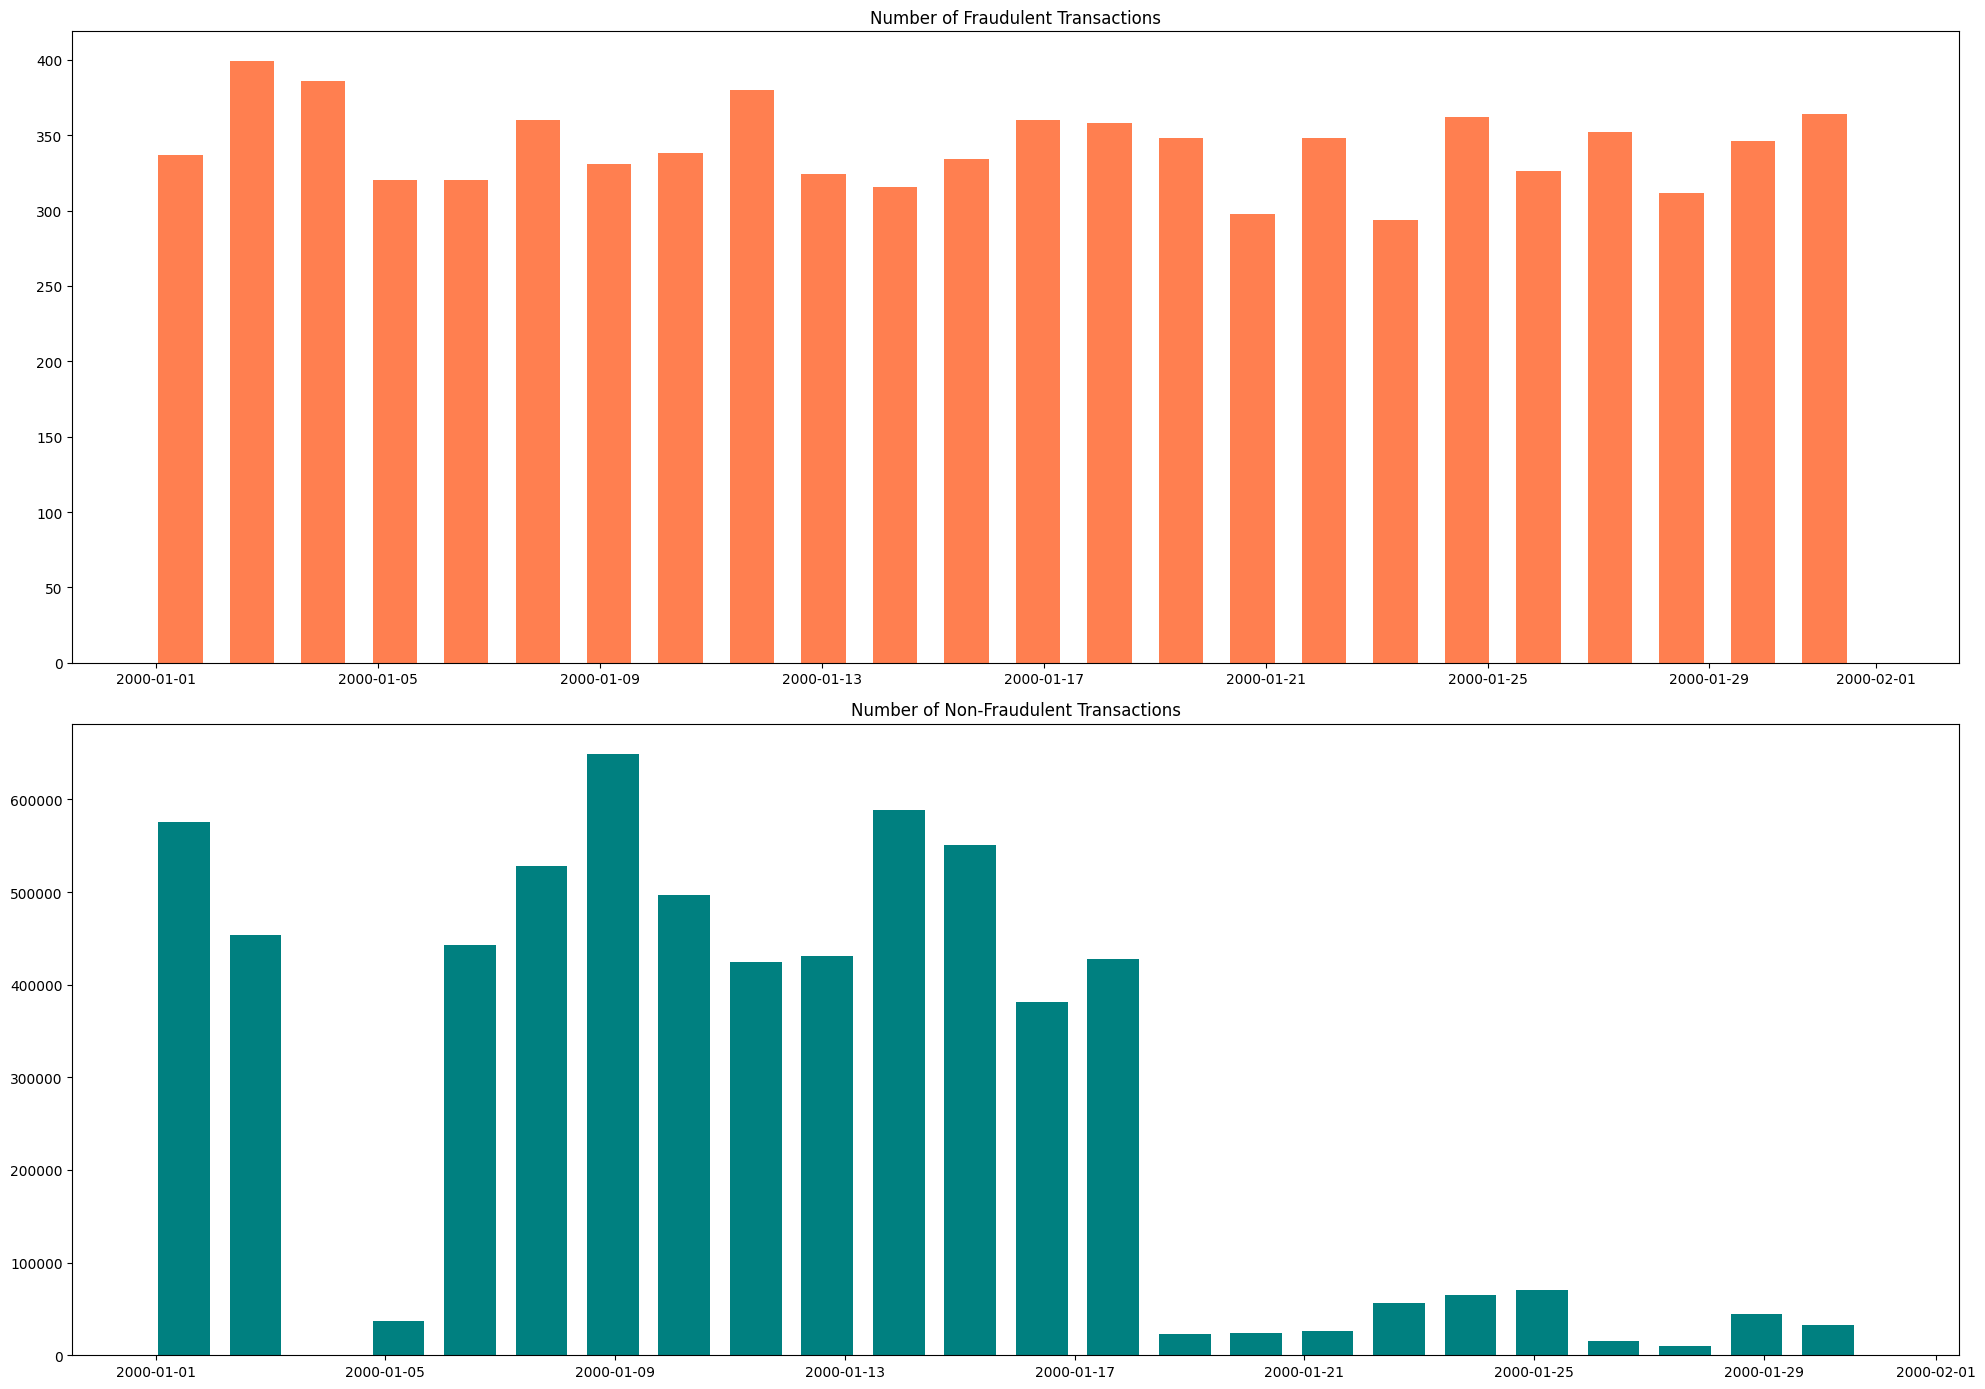

In [11]:
# converting the values in the 'step' column of the DataFrame 'df' into datetime objects. 
# It is using the 'unit' parameter to specify that the values in the 'step' column represent hours. 
# The 'origin' parameter is setting the reference point for the conversion to be January 1, 2000. 
# The resulting datetime objects are then stored in a new column named 'res_data' in the DataFrame 'df'.

df['res_data']=pd.to_datetime(df['step'], unit='h', origin=pd.Timestamp('2000-01-01'))
    
### Select the date, days of the week, hours, month  !not used in calculations
df['date'] = df.res_data.dt.date
df['day_of_week'] = df.res_data.dt.dayofweek
df['hour'] = df.res_data.dt.hour
df['month'] = df.res_data.dt.month
    

fig = plt.figure()
fig.set_size_inches(20, 14)
# Plot for Fraudulent Transactions
ax_1 = fig.add_subplot(2, 1, 1)
plt.hist(df[df['isFraud'] == 1]['res_data'], bins=24, color="coral", width=0.8)  # Assuming 24 hours in a day
ax_1.set_title('Number of Fraudulent Transactions')

# Plot for Non-Fraudulent Transactions
ax_2 = fig.add_subplot(2, 1, 2)
plt.hist(df[df['isFraud'] == 0]['res_data'], bins=24, color="teal", width=0.9)  # Assuming 24 hours in a day
ax_2.set_title('Number of Non-Fraudulent Transactions')

fig.tight_layout()
ax_1.set(title = 'Number of Fraudulent Transactions')
ax_2.set(title = 'Number of Non-Fraudulent Transactions')
plt.show()

How we can notice fraudulent transactions are distributed evenly over time, while regular transactions exhibit a certain pattern

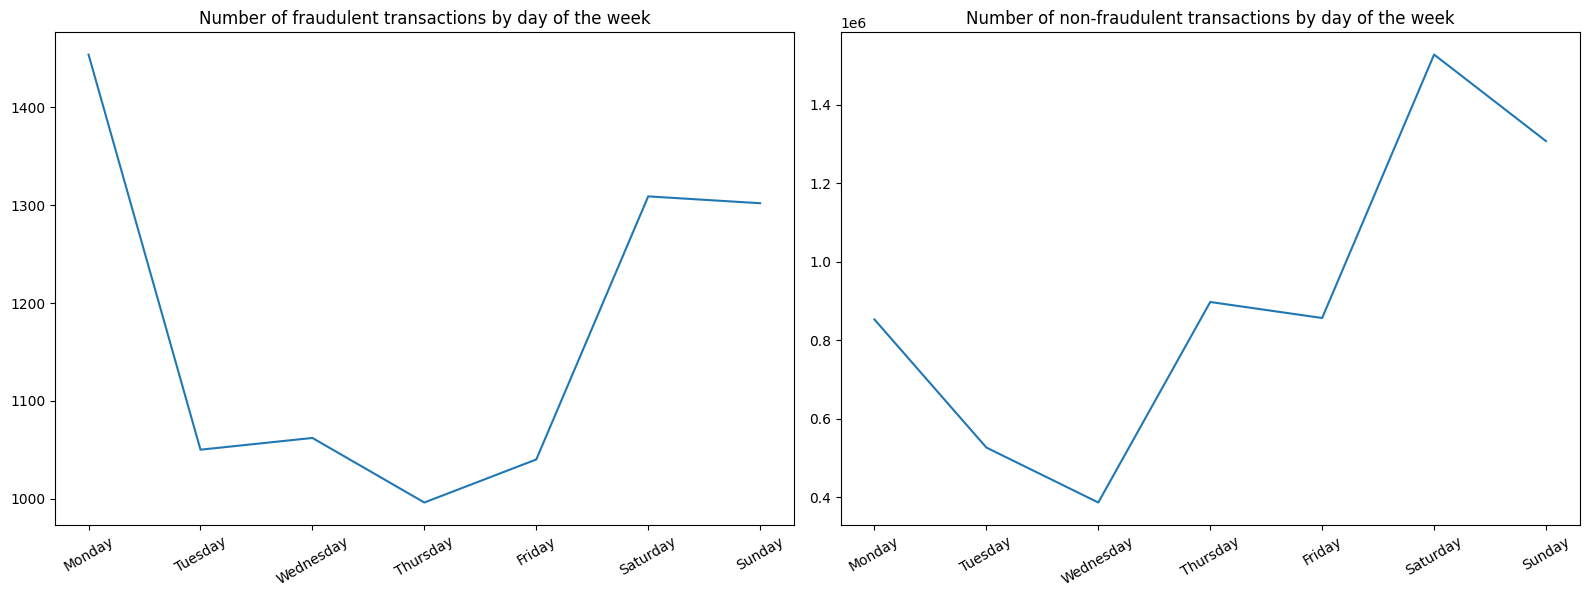

In [12]:
fig = plt.figure()
fig.set_size_inches(16, 6)

ax_1 = fig.add_subplot(1, 2, 1)
plt.plot(df[df['isFraud']==1].groupby(['day_of_week']).size())
plt.xticks(range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
           rotation=30)

ax_2 = fig.add_subplot(1, 2, 2)
plt.plot(df[df['isFraud']==0].groupby(['day_of_week']).size())
plt.xticks(range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
           rotation=30)

fig.tight_layout()
ax_1.set_title('Number of fraudulent transactions by day of the week')  # Use set_title instead of set
ax_2.set_title('Number of non-fraudulent transactions by day of the week')  # Use set_title instead of set
plt.show()


We see the maximum number of fraudulent transactions on Monday and minimum number of fraudulent transactions on Thursday

We see the maximum number of non-fraudulent transactions on Saturday and minimum number of fraudulent transactions on Wednesday



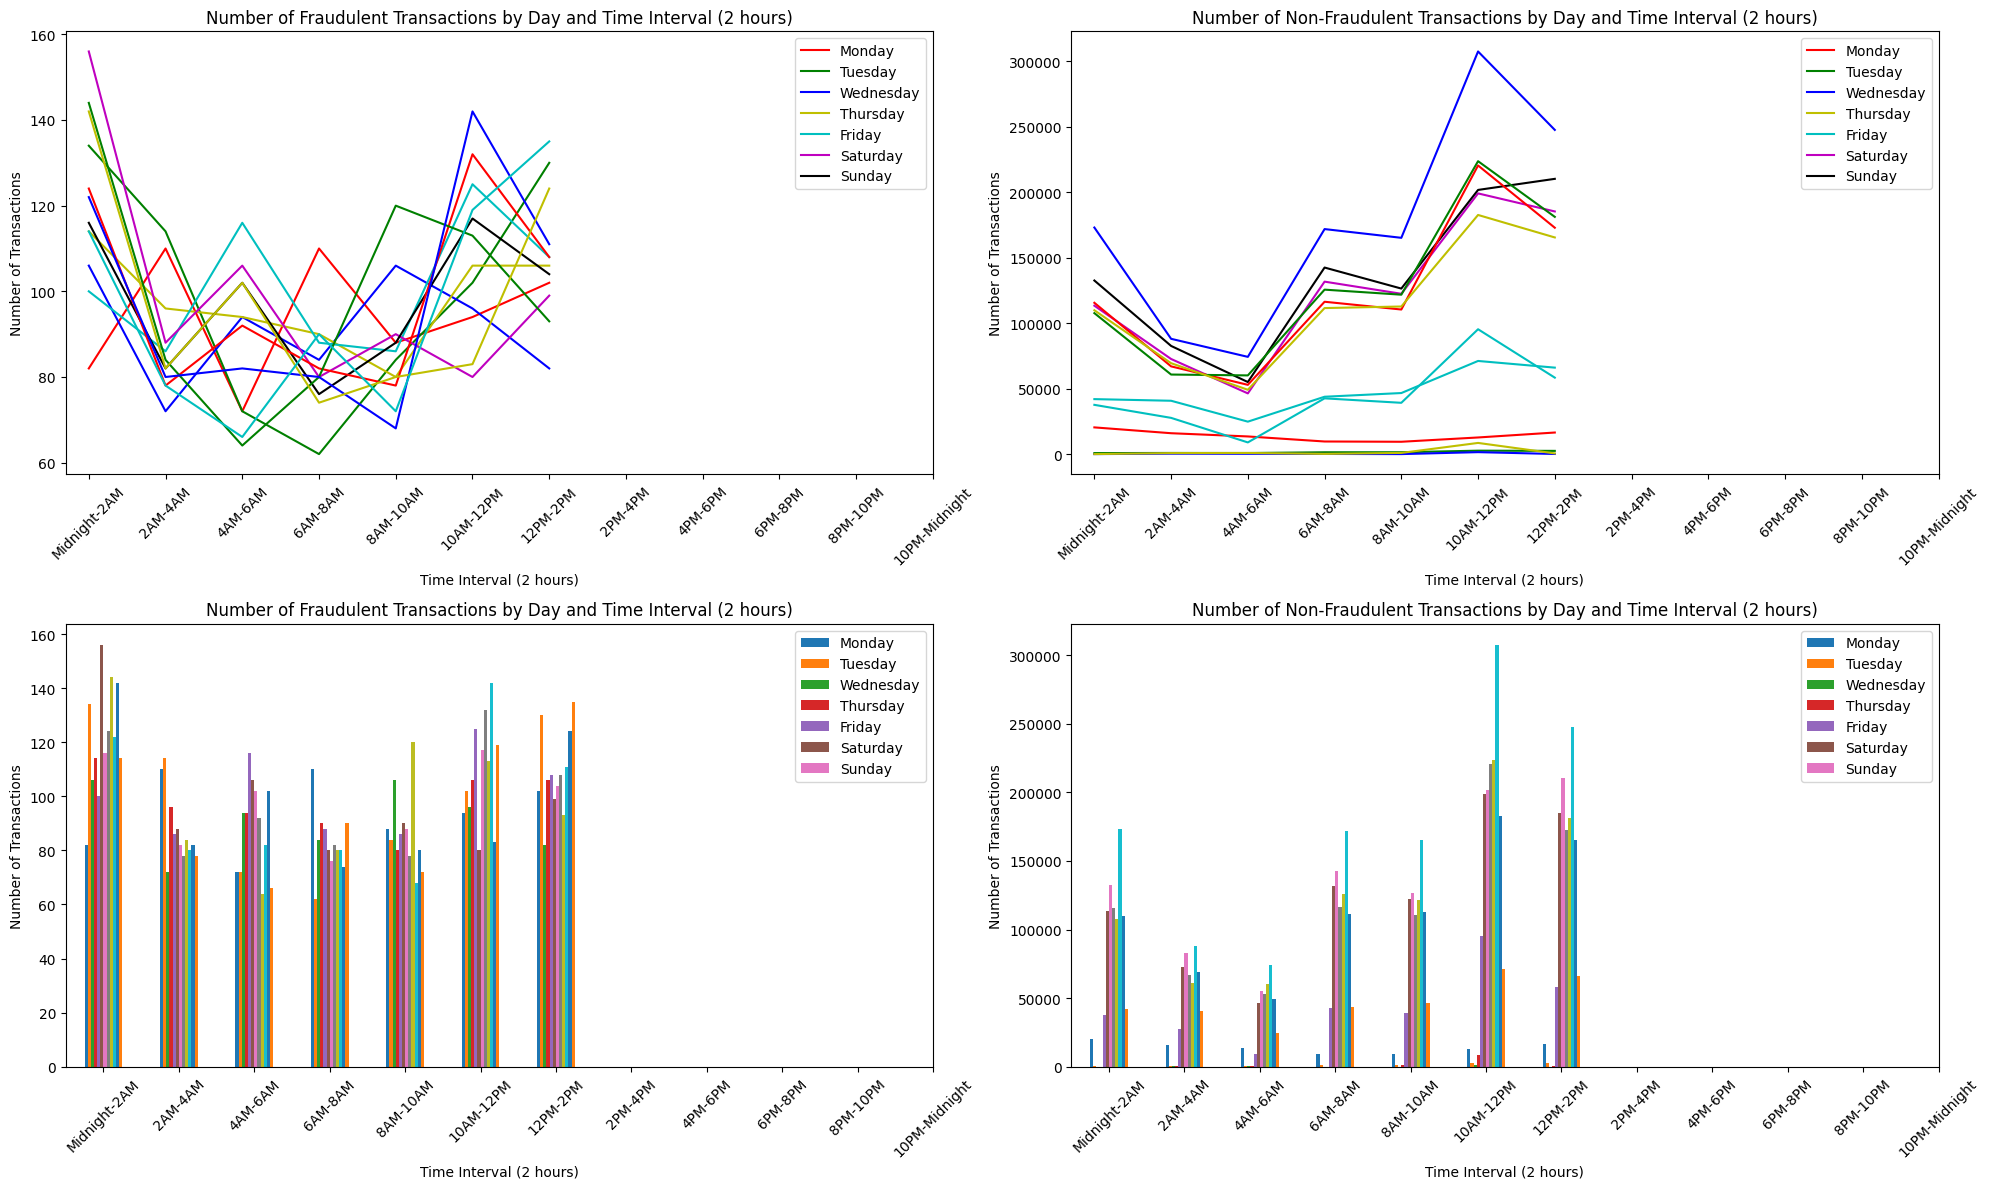

In [13]:
# Group fraudulent transactions by day and time interval of 2 hours
fraud_by_day_time = df[df['isFraud'] == 1].groupby([df['res_data'].dt.dayofweek, df['res_data'].dt.hour // 2]).size()

# Group non-fraudulent transactions by day and time interval of 2 hours
non_fraud_by_day_time = df[df['isFraud'] == 0].groupby([df['res_data'].dt.dayofweek, df['res_data'].dt.hour // 2]).size()

# Reshape data for plotting
fraud_data = fraud_by_day_time.unstack(fill_value=0)
non_fraud_data = non_fraud_by_day_time.unstack(fill_value=0)

# Plotting
plt.figure(figsize=(20, 12))

# Plot for Fraudulent Transactions (Line graph)
plt.subplot(2, 2, 1)
fraud_data.plot(kind='line', ax=plt.gca(), color=['r', 'g', 'b', 'y', 'c', 'm', 'k'])
plt.title('Number of Fraudulent Transactions by Day and Time Interval (2 hours)')
plt.xlabel('Time Interval (2 hours)')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 12), labels=['Midnight-2AM', '2AM-4AM', '4AM-6AM', '6AM-8AM', '8AM-10AM', '10AM-12PM', '12PM-2PM', '2PM-4PM', '4PM-6PM', '6PM-8PM', '8PM-10PM', '10PM-Midnight'], rotation=45)
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot for Non-Fraudulent Transactions (Line graph)
plt.subplot(2, 2, 2)
non_fraud_data.plot(kind='line', ax=plt.gca(), color=['r', 'g', 'b', 'y', 'c', 'm', 'k'])
plt.title('Number of Non-Fraudulent Transactions by Day and Time Interval (2 hours)')
plt.xlabel('Time Interval (2 hours)')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 12), labels=['Midnight-2AM', '2AM-4AM', '4AM-6AM', '6AM-8AM', '8AM-10AM', '10AM-12PM', '12PM-2PM', '2PM-4PM', '4PM-6PM', '6PM-8PM', '8PM-10PM', '10PM-Midnight'], rotation=45)
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot for Fraudulent Transactions (Bar graph)
plt.subplot(2, 2, 3)
fraud_data.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Number of Fraudulent Transactions by Day and Time Interval (2 hours)')
plt.xlabel('Time Interval (2 hours)')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 12), labels=['Midnight-2AM', '2AM-4AM', '4AM-6AM', '6AM-8AM', '8AM-10AM', '10AM-12PM', '12PM-2PM', '2PM-4PM', '4PM-6PM', '6PM-8PM', '8PM-10PM', '10PM-Midnight'], rotation=45)
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot for Non-Fraudulent Transactions (Bar graph)
plt.subplot(2, 2, 4)
non_fraud_data.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Number of Non-Fraudulent Transactions by Day and Time Interval (2 hours)')
plt.xlabel('Time Interval (2 hours)')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 12), labels=['Midnight-2AM', '2AM-4AM', '4AM-6AM', '6AM-8AM', '8AM-10AM', '10AM-12PM', '12PM-2PM', '2PM-4PM', '4PM-6PM', '6PM-8PM', '8PM-10PM', '10PM-Midnight'], rotation=45)
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()


It can be seen that the peak almost always falls at the same time on almost any day of the week, around 10am-2pm hours.

Cash_out and Transfer are the only types of transctions that have a chance to be fradulent

We can see there is a huge correlation between 'Amount' and 'OldBalance','new balance' as to the 'step' column and 'isflaggedFraud' which might help us to  predict if an account will be flagged for fraud or to find any pattern on what days and hours duing the  day that accounts get flagged.<br>

##### Data Preperation

In [15]:
# Drop the unused columns
df = df.drop(['step', 'nameOrig', 'nameDest', 'res_data', 'date', 'day_of_week', 'hour', 'month'], axis=1)


In [16]:
# Converting the dataset
# Convert data types for isFraud and isFlaggedFraud to boolean type
df['isFraud'] = df['isFraud'].astype(bool)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         bool   
 7   isFlaggedFraud  bool   
dtypes: bool(2), float64(5), object(1)
memory usage: 303.4+ MB


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_cols = ['type']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Encode categorical columns
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)  # Use get_feature_names_out method

# Drop the original categorical columns from the DataFrame and concatenate the encoded columns
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_cols], axis=1)


C:\Users\LOKESH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [19]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,False,False,0.0,0.0,1.0,0.0
1,1864.28,21249.00,19384.72,0.00,0.00,False,False,0.0,0.0,1.0,0.0
2,181.00,181.00,0.00,0.00,0.00,True,False,0.0,0.0,0.0,1.0
3,181.00,181.00,0.00,21182.00,0.00,True,False,1.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.00,0.00,False,False,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,True,False,1.0,0.0,0.0,0.0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,True,False,0.0,0.0,0.0,1.0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,True,False,1.0,0.0,0.0,0.0
6362618,850002.52,850002.52,0.00,0.00,0.00,True,False,0.0,0.0,0.0,1.0


#### TRAINING AND TESTING USING MULTIPLE MODELS

##### Logestic Regression

C:\Users\LOKESH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy (Logistic Regression): 0.9992310557600486
Testing Accuracy (Logistic Regression): 0.9992369495585152
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.91      0.45      0.61      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.73      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524



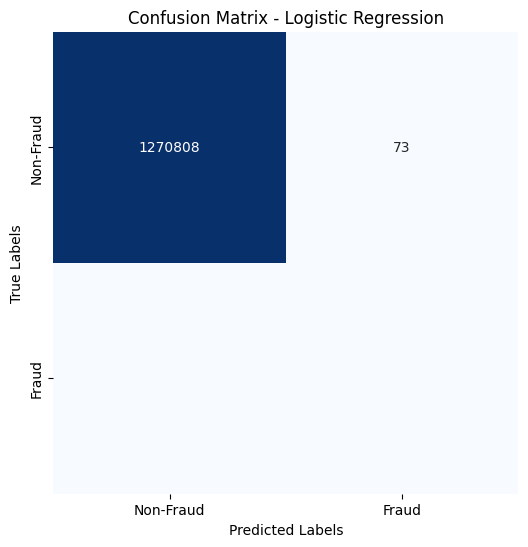

In [20]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, logreg.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)
print("Training Accuracy (Logistic Regression):", accuracy_train)
print("Testing Accuracy (Logistic Regression):", accuracy_test)

# Print classification report
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraud', 'Fraud'])
plt.show()


##### Decision Trees


Training Accuracy (Decision Tree): 1.0
Testing Accuracy (Decision Tree): 0.9997579613429688
Classification Report (Decision Tree):
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.91      0.90      0.91      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.95      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



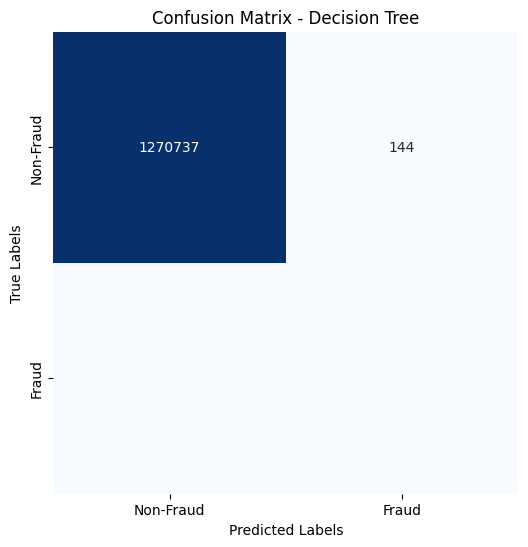

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_train_dt = accuracy_score(y_train, dt_classifier.predict(X_train))
accuracy_test_dt = accuracy_score(y_test, y_pred_dt)
print("Training Accuracy (Decision Tree):", accuracy_train_dt)
print("Testing Accuracy (Decision Tree):", accuracy_test_dt)

# Print classification report
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraud', 'Fraud'])
plt.show()


##### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_train_rf = accuracy_score(y_train, rf_classifier.predict(X_train))
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)
print("Training Accuracy (Random Forest):", accuracy_train_rf)
print("Testing Accuracy (Random Forest):", accuracy_test_rf)

# Print classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))




Training Accuracy (Random Forest): 0.9999990177002556
Testing Accuracy (Random Forest): 0.9996880216011643
Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.96      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



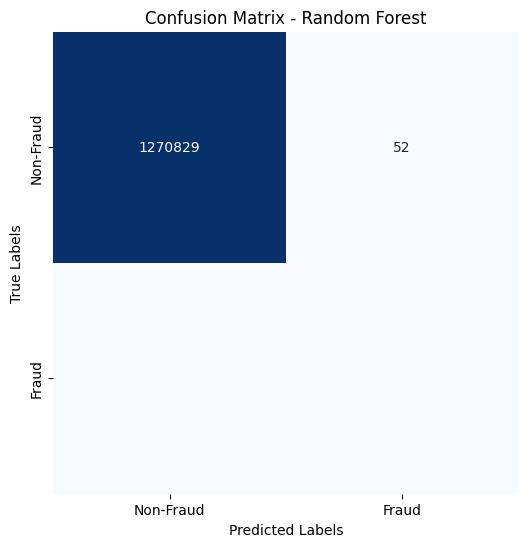

In [23]:
# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraud', 'Fraud'])
plt.show()

##### XGBoost

Training Accuracy (XGBoost): 0.999715133074111
Testing Accuracy (XGBoost): 0.9996495154511821
Classification Report (XGBoost):
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.95      0.77      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



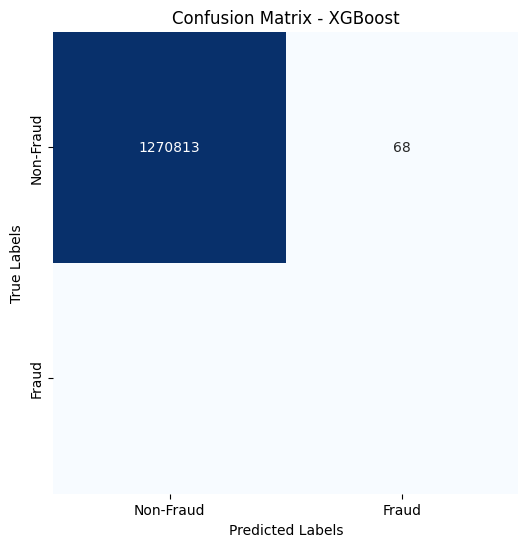

In [24]:
import xgboost as xgb

# Initialize the model
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_train_xgb = accuracy_score(y_train, xgb_classifier.predict(X_train))
accuracy_test_xgb = accuracy_score(y_test, y_pred_xgb)
print("Training Accuracy (XGBoost):", accuracy_train_xgb)
print("Testing Accuracy (XGBoost):", accuracy_test_xgb)

# Print classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Plot confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraud', 'Fraud'])
plt.show()


##### Plotting Accuracy line Graph and Bar Graph

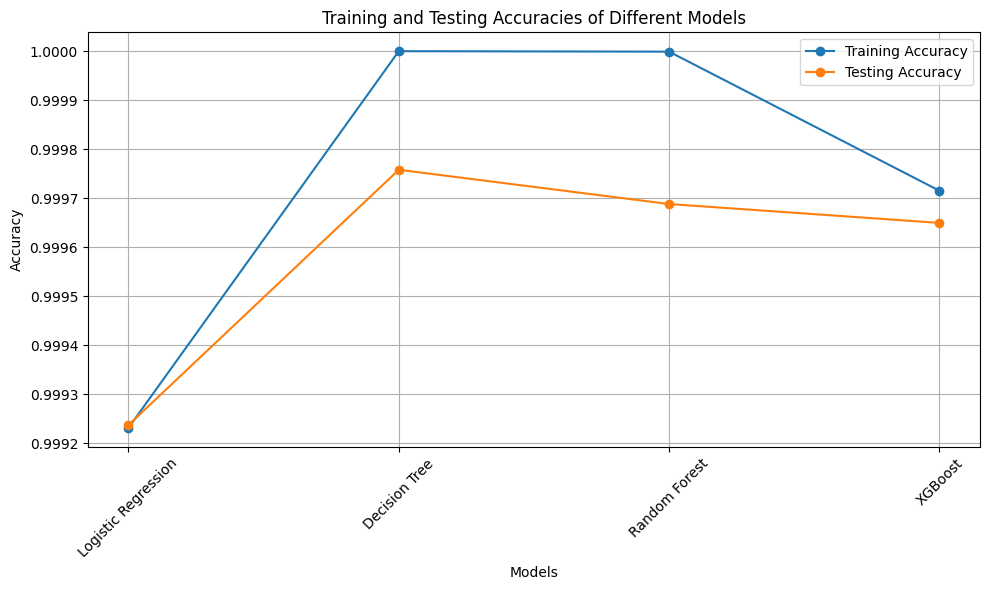

In [25]:
# Collect accuracy scores for each model
train_accuracy_scores = [accuracy_train, accuracy_train_dt, accuracy_train_rf, accuracy_train_xgb]
test_accuracy_scores = [accuracy_test, accuracy_test_dt, accuracy_test_rf, accuracy_test_xgb]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracy_scores, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(models, test_accuracy_scores, marker='o', linestyle='-', label='Testing Accuracy')
plt.title('Training and Testing Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


we can see Decision Tree and Random Forest Both have same training accuracy but Decision Tree shows more accuracy in Testing compared to Random Forest 

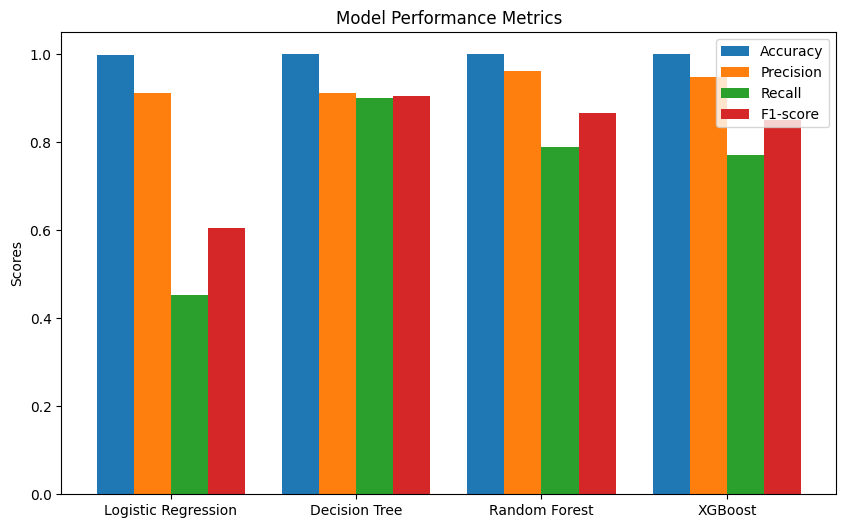

: 

In [26]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Collect metrics for each model
accuracy = [accuracy_test, accuracy_test_dt, accuracy_test_rf, accuracy_test_xgb]
precision = [precision_score(y_test, y_pred), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_xgb)]
recall = [recall_score(y_test, y_pred), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb)]
f1 = [f1_score(y_test, y_pred), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb)]

labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Plot bar graph
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()



Decision Tree Model  demonstrates robust performance, especially in the harmony of Precision and Recall, as reflected by the F1-score. However, it takes a longer runtime than Logistic Regression.